In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
column = ['ID','target']
for i in range(30):
    column.append('parameter'+str(i+1))  
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',names = column)

In [3]:
df

,ID,target,parameter1,parameter2,parameter3,parameter4,parameter5,parameter6,parameter7,parameter8,parameter9,parameter10,parameter11,parameter12,parameter13,parameter14,parameter15,parameter16,parameter17,parameter18,parameter19,parameter20,parameter21,parameter22,parameter23,parameter24,parameter25,parameter26,parameter27,parameter28,parameter29,parameter30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

In [4]:
df = df.drop('ID',axis=1)

In [5]:
df

,target,parameter1,parameter2,parameter3,parameter4,parameter5,parameter6,parameter7,parameter8,parameter9,parameter10,parameter11,parameter12,parameter13,parameter14,parameter15,parameter16,parameter17,parameter18,parameter19,parameter20,parameter21,parameter22,parameter23,parameter24,parameter25,parameter26,parameter27,parameter28,parameter29,parameter30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
#converting targets to Label encoding

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['target'] = le.fit_transform(df['target']);

In [19]:
from sklearn.model_selection import train_test_split
X = df.copy()
Y = df['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [170]:
# We use minkowski distance as our distance metric. By setting the parameter p to 2 we get euclidean distance
# distance(a,b) = ((a0-b0)^p+(a1-b1)^p)....)^(1/p)
def minkowski_distance(a, b, p=2):
    
    dim = len(a)
    distance = 0
    for d in range(dim):
    distance += abs(a[d] - b[d])**p
    distance = distance**(1/p)  
    return distance

In [214]:
#returns numpy array of k nearest neighbours 

def neighbours(X_actual,X_1,point,k):
 
    distance = np.array([X_1.apply(lambda row:minkowski_distance(row,point),axis=1),X_actual['target']]) #finds the minkowski distance of the target point with respect to all other points in train set
    distance = np.transpose(distance)
    distance=distance[np.argsort(distance[:,0])] #sorts by distance in ascending order
    k_neighbours = list()
    for i in range(k):
        k_neighbours.append(distance[i][1]) #stores the labels of the k closest neighbours
    return np.array(k_neighbours,dtype = object)  

In [209]:
# predicts the class of the given test point

def predict(data,test_point,k):

    k_neighbour = neighbours(data,data.drop('target',axis=1),test_point,k) # obtains the labels of k nearest neighbours
    k_neighbour = np.array(k_neighbour,dtype=int)
    return np.bincount(k_neighbour).argmax() # returns the label with maximum frequency

In [250]:
# finds the predictions of all points in the test set

def K_nearest_neighbours(train,test,k):

    predictions = list()

    for index,sample in test.iterrows():
        output = predict(train,sample.drop('target').values,k)
        predictions.append(output)
    return np.array(predictions)  

In [162]:
# returns accuracy of the predictions made

def accuracy(train,test,k,actual_value):

    predictions = K_nearest_neighbours(train,test,k)
    return np.sum(predictions==actual_value)/len(actual_value)

Plotting accuracy plot for K values ranging from 1 - 100. We see that a small value of K classifies well.

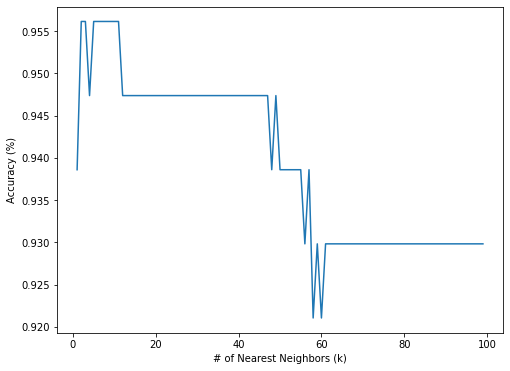

In [252]:
accuracies = []

for k in range(1,100):
    accuracies.append(accuracy(X_train,X_test,k,Y_test))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');    

In [251]:
k = 5
accuracy(X_train,X_test,k,Y_test)

0.956140350877193

We see that the scratch implementation returns a similar accuracy as that produced by sklearn's KNeighborsClassifier

In [257]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.drop('target',axis=1),Y_train)
knn.score(X_test.drop('target',axis=1), Y_test)

0.956140350877193